# Fast Fourier Transform

In [1]:
import numpy as np

In [3]:
def DFT_slow(x):
    '''Compute the discrete Fourier Transform of the 1D array x'''
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [5]:
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [7]:
%timeit DFT_slow(x)

1 loop, best of 3: 466 ms per loop


In [8]:
%timeit np.fft.fft(x)

10000 loops, best of 3: 181 µs per loop


In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
import scipy

### Base signal

In [9]:
Fs = 150.0 # sampling rate

In [10]:
Ts = 1.0/Fs # sampling interval

In [11]:
t = np.arange(0, 1, Ts) # time vector

In [12]:
ff = 5 # frequency of the signal

In [15]:
y = np.sin(2*np.pi*ff*t)

### FFT

In [18]:
n = len(y) # length of the signal

In [19]:
k = np.arange(n)

In [20]:
T = n / Fs

In [22]:
frq = k / T # two side frequency range

In [31]:
frq = frq[range(n//2)]

In [33]:
Y = scipy.fft(y) / n # fft coomputing and normalization

In [34]:
Y = Y[range(n//2)]

### Plot

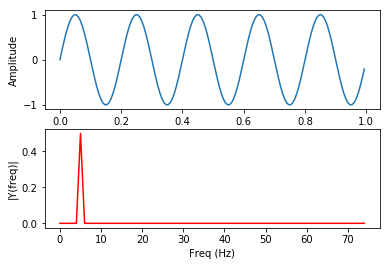

In [36]:
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(2,1,2)
plt.plot(frq, abs(Y), 'r') # plotting the spectrum
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')